
<center>
<font color="cyan"><h2 >Sub Graphs</h2></font>
</center>




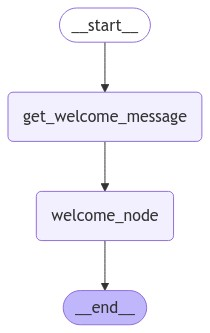

In [127]:
# Welcome SubGraph
from langgraph.graph import START,END,StateGraph
from typing import TypedDict,List,Annotated
import operator
from IPython.display import display,Image

class WelcomeState(TypedDict):
    welcome_message : str
    parent_message : str
    node_call_details : List[str]
class WelcomeOutputState(TypedDict):
    welcome_message : str
    node_call_details : List[str]
def get_welcome_message(state):
    return {'welcome_message':"GoodMorning!!"}

def welcome_node(state:WelcomeState):
    state['node_call_details'].append("welcome_node called")
    print("State From WelcomeNode : ",state)
    return {'welcome_message': state['parent_message'] + state['welcome_message'], 'node_call_details' : state['node_call_details']}



welcome_builder = StateGraph(WelcomeState,output=WelcomeOutputState)
welcome_builder.add_node('welcome_node',welcome_node)
welcome_builder.add_node('get_welcome_message',get_welcome_message)
welcome_builder.add_edge(START,'get_welcome_message')
welcome_builder.add_edge('get_welcome_message','welcome_node')
welcome_builder.add_edge('welcome_node',END)

welcome_graph = welcome_builder.compile()

display(Image(welcome_graph.get_graph().draw_mermaid_png()))



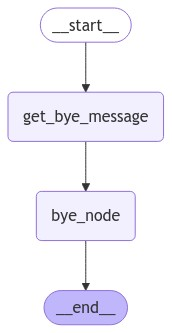

In [128]:
# Bye Sub Graph

class ByeState(TypedDict):
    bye_message : str 
    parent_message : Annotated[str, "appendable"]
    node_call_details : List[str]

class WelcomeOutputState(TypedDict):
    bye_message : str
    node_call_details : List[str]

def get_bye_message(state):
    return {'bye_message':"Bye"}
    
def bye_node(state:ByeState):
    state['node_call_details'].append("bye_node called")
    print("State From ByeNode : ",state)
    return {'bye_message': state['parent_message'] + state['bye_message'], 'node_call_details' : state['node_call_details']}

bye_builder = StateGraph(ByeState,output=WelcomeOutputState)
bye_builder.add_node('bye_node',bye_node)
bye_builder.add_node('get_bye_message',get_bye_message)
bye_builder.add_edge(START,'get_bye_message')
bye_builder.add_edge('get_bye_message','bye_node')
bye_builder.add_edge('bye_node',END)

bye_graph = bye_builder.compile()

display(Image(bye_graph.get_graph().draw_mermaid_png()))

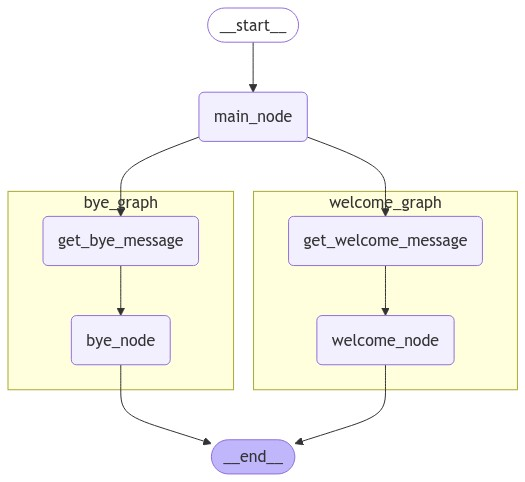

In [137]:
# Parent or Main Graph
class State(TypedDict):
    parent_message : str
    node_call_details: Annotated[List[str],operator.add]

def main_node(state):

    state['node_call_details'].append("parent node called")
    return {'parent_message':state['parent_message'],'node_call_details':state['node_call_details']}


builder = StateGraph(State)
builder.add_node('main_node',main_node)
builder.add_node('welcome_graph',welcome_builder.compile())
builder.add_node('bye_graph',bye_builder.compile())

builder.add_edge(START,'main_node')
builder.add_edge('main_node','welcome_graph')
builder.add_edge('main_node','bye_graph')
builder.add_edge('welcome_graph',END)
builder.add_edge('bye_graph',END)

main_graph = builder.compile()

display(Image(main_graph.get_graph(xray=3).draw_mermaid_png()))


In [ ]:
main_graph.invoke({'parent_message': "Hey. Aditya.",'node_call_details':[]})




State From WelcomeNode : State From ByeNode :  {'bye_message': 'Bye', 'parent_message': 'Hey. Aditya.', 'node_call_details': ['parent node called', 'parent node called', 'welcome_node called', 'bye_node called']}
 {'welcome_message': 'GoodMorning!!', 'parent_message': 'Hey. Aditya.', 'node_call_details': ['parent node called', 'parent node called', 'welcome_node called', 'bye_node called']}


{'parent_message': 'Hey. Aditya.',
 'node_call_details': ['parent node called',
  'parent node called',
  'welcome_node called',
  'bye_node called',
  'parent node called',
  'parent node called',
  'welcome_node called',
  'bye_node called',
  'parent node called',
  'parent node called',
  'welcome_node called',
  'bye_node called']}